# An Analysis of Key Drivers of Churn at Telco
### Presented By: Kristine Cabanela
### November 29, 2021

In [1]:
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import acquire as acquire

### Initial Questions

Which demographic of individuals are churning? Are these customers senior citizens or non-senior citizens?

Do the customers that are churning have dependents or no dependents?

What type of payment type are customers using that are churning at a higher rate?

What type of payment type are customers using that are less likely to churn?

### Acquire

- I wrote a sql query to acquire my data from the Codeup database.
- I'm importing my get_telco_data function from my acquire.py file that will create a local csv file of my data for future use.

In [2]:
from acquire import get_telco_data

In [3]:
original_telco = get_telco_data()
original_telco.head()

# Rename, Read telco data as dataframe

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
original_telco.info()

# View total number of columns, Datatypes
# Observe original data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
original_telco.describe()

# Show summary of statistics for columns
# Observe original data

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [6]:
original_telco.dtypes

# view all datatypes
# Observe original data

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

### Prepare and Explore
- Clean Data

In [7]:
pd.crosstab(original_telco.internet_service_type_id, original_telco.internet_service_type)

# Drop unnecessary. duplicate columns

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


In [8]:
original_telco.isna().sum()

# check for any columns with significant nulls

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [9]:
original_telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

#drop unneeded duplicate columns


In [10]:
original_telco

# confirm drop changes

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,Female,0,No,No,19,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,Female,0,No,No,6,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,Male,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,18.90,18.9,No,Month-to-month,None,Mailed check


In [11]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(original_telco, test_size=.2, random_state=123, stratify=original_telco.churn)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)

In [12]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 20)
validate -> (1691, 20)
test -> (1409, 20)


In [13]:
def split_data():
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(original_telco, test_size=.2, random_state=123, stratify=original_telco.churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    return train, validate, test

In [14]:
train, validate, test = split_data()

In [15]:
# Validate my split

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 20)
validate -> (1691, 20)
test -> (1409, 20)


In [16]:
df = acquire.get_telco_data()
train, validate, test = split_data()

In [17]:
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,2,3,1,9975-SKRNR,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,18.90,18.9,No,Month-to-month,None,Mailed check


In [18]:
df = original_telco.copy()
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,Male,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,Female,0,No,No,19,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,Female,0,No,No,6,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,Male,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,18.90,18.9,No,Month-to-month,None,Mailed check


In [22]:
df.churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: churn, dtype: int64

In [37]:
pd.crosstab(df.senior_citizen, df.senior_citizen)

senior_citizen,0,1
senior_citizen,,
0,5901,0
1,0,1142


In [21]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

<AxesSubplot:>

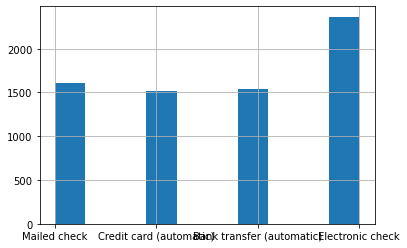

In [40]:
df.payment_type.hist()

In [23]:
df.dependents.value_counts()

# Without Dependents - higher likelihood of churn

No     4933
Yes    2110
Name: dependents, dtype: int64

<AxesSubplot:>

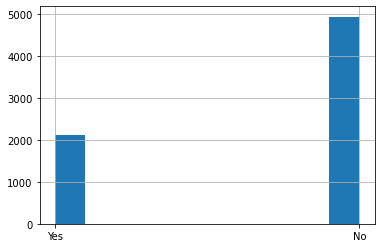

In [41]:
df.dependents.hist()

In [34]:
pd.crosstab(df.dependents, df.payment_type)

# Electronic Check - Churn

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
dependents,,,,
No,1012,986,1886,1049
Yes,532,536,479,563


In [24]:
df.gender.value_counts(dropna=False)

# Gender - not significant in churn

Male      3555
Female    3488
Name: gender, dtype: int64

In [25]:
df.senior_citizen.value_counts()

# Is not senior - higher likelihood of churn

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [26]:
dummy_df = pd.get_dummies(df[['gender','churn']], dummy_na=False, drop_first=[True, True])


df = df.drop(columns=["gender", "churn"])


df = pd.concat([df, dummy_df], axis=1)
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,gender_Male,churn_Yes
0,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,Two year,DSL,Mailed check,0,0
1,0,No,No,54,No,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,Two year,DSL,Credit card (automatic),1,0
2,0,No,No,56,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,Two year,DSL,Bank transfer (automatic),0,0
3,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,Two year,DSL,Credit card (automatic),1,0
4,0,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,Two year,DSL,Bank transfer (automatic),1,0


In [27]:
dummy_df.value_counts()

gender_Male  churn_Yes
1            0            2625
0            0            2549
             1             939
1            1             930
dtype: int64

### Conclusion Summary

Key Takeaways:

- Demographics for customers who are churning (Non-Senior citizens) are more likely to churn than senior citizens, gender between male and female is insignificant in who is more or less likely to churn.

- The likelihood of customers who churn is higher for individuals without dependents

- The payment type that customers are using is significant in customer who are churning
    - Customers who are paying with electronic check have a higher churn rate than any other payment method
    - Customers paying with an automatic payment method such as automatic credit card payment or automatic bank transfer are lease likely to churn

### Conclusion Recommendations

- Based on these key takeaways we can conclude customers who do not have dependents are churning at a higher rate, we can 
- To retain customers who are paying with the electronic check method we can make efforts to persuade customers to opt into another payment method such as the automatic credit card or bank transfer since we have concluded these individuals are least likely to churn.

### Conclusion Next Steps

- Implement recommendations to increase customer retention
- Next steps would include researching whether individuals who do have dependents are on a discount plan for families, that may include additional services and multiple lines. We can further research if the individuals who are churning that do not have dependents are leaving because of cost/higher monthly/total charges.
